In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

# Data importation

In [ ]:
# path to data
path = pathlib.PosixPath("../data/png_unscaled_data")

In [ ]:
# validation set percentage
valid_pct=0.2
# picture size
size = 224
# fix seed for reproducible data split
seed = 42

In [ ]:
# defines transformations that will be used to augment the training set :
# lighting is constant so not modified
# vertical flips are not meaningful as the pictures have been oriented
# horizontal flips seem to be meaningful (despite the possibility of creating mirror chromosomes)
tfms = get_transforms(max_lighting=None, do_flip=True, flip_vert=False)

In [ ]:
# imports a list of pictures
# (takes the negativ of the picture so that black is the background color)
il = ImageList.from_folder(path, after_open=PIL.ImageOps.invert)
# splits into train/test and adds labels
src = il.split_by_rand_pct(valid_pct, seed=seed).label_from_folder()
# builds a databunch
data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms, size=size, num_workers=8, resize_method=ResizeMethod.SQUISH, padding_mode='zeros').normalize()

# Training of the model

In [ ]:
# defines model
learn = cnn_learner(data, models.resnet34, pretrained=False, metrics=accuracy)

In [ ]:
# finds a good learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-2)
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,0.403171,0.339453,0.899932,29:21
1,0.381812,0.331122,0.900779,29:25
2,0.356397,0.318610,0.905083,29:14
3,0.339234,0.307713,0.910007,29:38
4,0.344642,0.305546,0.910170,29:12


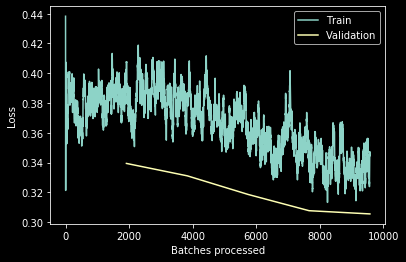

In [9]:
learn.fit_one_cycle(5, max_lr=1e-3)
learn.recorder.plot_losses()

In [10]:
# 0.91
learn.save("scratch")

In [ ]:
#learn.load("scratch")